In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from ipywidgets import interact
from scipy.optimize import curve_fit

In [2]:


#def wolffstep(lattice, J, B, beta):
#    addp = 1. - np.exp(-2. * J * beta)
#    cluster = np.full((L, L), False)
#    lx, ly = np.random.randint(L, size=2)
#    def _grow():
#        cluster[lx, ly] = True
#        for nbr in nbr(lattice, (lx, ly)):
#            if (!cluster[nbr]):
#                add(nbr, lattice, (lx, ly))
#    def _add(nbr, ):
#        if 

def display_grid(lattice):
    return Image.fromarray(np.uint8((lattice+1)*0.5*255))

def display_seq(images):
    def _show(frame=(0, len(images)-1)):
        display_grid(images[frame])
    return interact(_show)

In [26]:
L = 10
tmax = 1000
J = 1.
B = 0.
df = pd.DataFrame()
#plt.figure()
Temps = np.arange(.2, 4.2, 0.3)
#Temps = np.array([2.6])
for T in Temps:
    count, accepted = 0.0, 0.0
    #for meas in range(5):
    #lattice = np.array([1 for j in range(L*L)])
    lattice = 2*np.random.randint(2, size=(L, L))-1
    mag = []
    beta = 1./T
    for t in range(tmax):
        for i in range(L):
            for j in range(L):
                count += 1.
                a = np.random.randint(0, L)
                b = np.random.randint(0, L)
                s = lattice[a, b]
                nb = lattice[(a+1)%L, b] + lattice[a, (b+1)%L] + lattice[(a-1)%L, b] + lattice[a, (b-1)%L]
                deltaE = 2*s*nb
                if deltaE < 0:
                    accepted += 1.
                    lattice[a, b]*=-1
                elif np.random.rand() < np.exp(-deltaE*beta):
                    accepted += 1.
                    lattice[a, b]*=-1
        if (t%10==0):
            mag.append(lattice.sum()/(L*L))
    df['mag'+f'{T:.1f}'] = pd.Series(mag)
    print(accepted/count, 'is the acceptance ratio')

0.00235 is the acceptance ratio
0.00452 is the acceptance ratio
0.00112 is the acceptance ratio
0.00375 is the acceptance ratio
0.01149 is the acceptance ratio
0.03377 is the acceptance ratio
0.0888 is the acceptance ratio
0.1711 is the acceptance ratio
0.31439 is the acceptance ratio
0.42877 is the acceptance ratio
0.49396 is the acceptance ratio
0.54664 is the acceptance ratio
0.58772 is the acceptance ratio
0.62475 is the acceptance ratio


In [19]:
df

mag0.2  mag0.5  mag0.8  mag1.1  mag1.4  mag1.7  mag2.0  mag2.3  mag2.6  \
0     0.46    0.04    0.14    0.04    0.10   -0.04   -0.22   -0.16   -0.10   
1     1.00    0.98   -0.52   -0.52    0.84   -0.76   -0.52    0.04    0.68   
2     1.00    1.00   -1.00   -1.00    1.00   -1.00   -0.90    0.32    0.48   
3     1.00    1.00   -1.00   -1.00    0.94   -1.00   -0.84    0.56    0.32   
4     1.00    1.00   -1.00   -1.00    1.00   -0.98   -0.88    0.62    0.44   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95    1.00    1.00   -1.00   -1.00    1.00   -0.98   -0.96    0.40   -0.68   
96    1.00    1.00   -1.00   -1.00    1.00   -0.92   -0.90    0.80   -0.86   
97    1.00    1.00   -1.00   -1.00    1.00   -1.00   -0.94    0.60   -0.86   
98    1.00    1.00   -1.00   -1.00    0.98   -1.00   -0.98    0.64   -0.16   
99    1.00    1.00   -1.00   -1.00    1.00   -0.98   -0.98    0.68   -0.48   

    mag2.9  mag3.2  mag3.5  mag3.8  mag4.1  
0    -0.34   -0.06   -0.28   -0.24    0.00  
1     0.54    0.06   -0.40    0.48    0.34  
2     0.34    0.02    0.20    0.30    0.18  
3    -0.06    0.16    0.34    0.26    0.00  
4    -0.08    0.06    0.42    0.34   -0.06  
..     ...     ...     ...     ...     ...  
95   -0.14    0.30   -0.10   -0.16   -0.28  
96   -0.34    0.08    0.16   -0.54   -0.08  
97   -0.56   -0.32    0.24    0.34    0.08  
98    0.02   -0.08    0.22    0.04    0.16  
99   -0.50   -0.28   -0.08   -0.12    0.36  

[100 rows x 14 columns]

<AxesSubplot:>

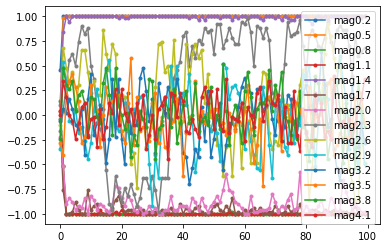

In [24]:
# for i in range(len(df.columns)):
df.plot(marker='.')

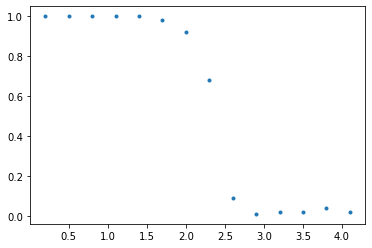

In [20]:
plt.plot(Temps, abs(df.median()), '.')

# Size vs Mag

In [23]:
Lengths = [10, 20, 50, 80]
tmax = 1000
J = 1.
B = 0.
df = pd.DataFrame()
beta = np.log(1+np.sqrt(2))/2
for L in Lengths:
    times = []
    count, accepted = 0.0, 0.0
    lattice = 2*np.random.randint(2, size=(L, L))-1
    mag = []
    for t in range(tmax):
        for i in range(L):
            for j in range(L):
                count += 1.
                a = np.random.randint(0, L)
                b = np.random.randint(0, L)
                s = lattice[a, b]
                nb = lattice[(a+1)%L, b] + lattice[a, (b+1)%L] + lattice[(a-1)%L, b] + lattice[a, (b-1)%L]
                deltaE = 2*s*nb
                if deltaE < 0:
                    accepted += 1.
                    lattice[a, b]*=-1
                elif np.random.rand() < np.exp(-deltaE*beta):
                    accepted += 1.
                    lattice[a, b]*=-1
                if (int(count)%10==0):
                    times.append(int(count))
                    mag.append(lattice.sum()/(L*L))
    df['t'] = pd.Series(times)
    df['mag'+f'{L}'] = pd.Series(mag)
    print(accepted/count, 'is the acceptance ratio')

0.17669 is the acceptance ratio
0.20973 is the acceptance ratio
0.20777 is the acceptance ratio
0.20713546875 is the acceptance ratio


<AxesSubplot:xlabel='t'>

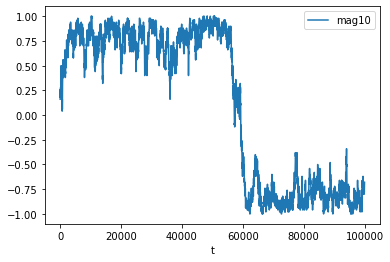

In [31]:
df.plot(x='t', y='mag10')

In [25]:
def exponential(x, a, b):
    return a*np.exp(-x/b)
def linear(x, a, b):
    return a+b*x

In [26]:
tcorr = []
for i in range(4):
    a = df.iloc[:, i] - df.iloc[:, i].mean()
    corr = np.correlate(a[:500], a[:500], mode='full')
    corr = corr[corr.size//2:]
    popt, pcov = curve_fit(exponential, np.arange(corr.size)[corr>0], corr[corr>0])
    #plt.plot(corr)
    #plt.plot(exponential(np.arange(corr.size), *popt))
    tcorr.append(popt[1])

/usr/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


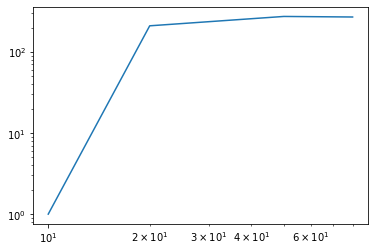

In [29]:
plt.plot(np.array(Lengths), tcorr)
plt.xscale('log')
plt.yscale('log')